# Working with large data set

In this workshop, we will use real data imported from csv file (boston.csv) instead of made-up ones

In [1]:
# import everything we need
import numpy as np
import pandas as pd

In [2]:
''' 
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''

" \nVariables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by town\n B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n LSTAT    % lower status of the population\n MEDV     Median value of owner-occupied homes in $1000's\n "

### Construct a dataframe for our data and target for a better illustration
### set the columns names according to the result above and show the first 5 rows

In [3]:
# Construct a dataframe for our data and target for a better illustration
# set the columns names according to the result above
df = pd.read_csv('boston.csv')
df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Model Training

In [4]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [5]:
# notice that we need double square brackets to select X
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
rm = df[['RM']]
medv = df['MEDV']
print(rm)

        RM
0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
..     ...
501  6.593
502  6.120
503  6.976
504  6.794
505  6.030

[506 rows x 1 columns]


In [6]:
# We need 2D arrays for x_train 
x_train,x_test,y_train,y_test = train_test_split(rm,medv,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)

(404, 1)
(102, 1)


In [7]:
x_train.head(10)

,RM
477,5.304
15,5.834
332,6.031
423,6.103
19,5.727
325,6.431
335,6.037
56,6.383
437,6.152
409,6.852


In [8]:
# instantiate a linear regression model
# train the model to fit the training data, finding the coef and intercept
from sklearn.linear_model import LinearRegression

#instantiate
linReg = LinearRegression()

linReg.fit(x_train,y_train)

print(linReg.intercept_)
print(linReg.coef_)

-36.24631889813795
[9.34830141]


# Prediction

Now that we've trained our model, the next step is to predict the data.

Steps:

    Get predictions, 𝑦̂, using LinearRegression.predict()


In [9]:
ŷ = linReg.predict(x_test)
print(ŷ[:10])

[23.73238293 26.92950201 19.68456842 20.45112913 22.61993506 22.45166563
 19.03953562 21.47009399 21.98425056 20.09589368]


In [10]:
print(linReg.predict([[7]]))

[29.19179095]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Model Validation

We want to see how well our model fits the data. r2-score should be as close to 1 as possible

In [11]:
# we can see the coefficient and intercept our model finds
from sklearn.metrics import r2_score
print('r2_score: ',r2_score(y_test,ŷ))
print('score: ',linReg.score(x_test,y_test))

r2_score:  0.3707569232254778
score:  0.3707569232254778


As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
We can visualize it to see what the model looks like

Plot the regression line (blue) vs the actual value (red)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


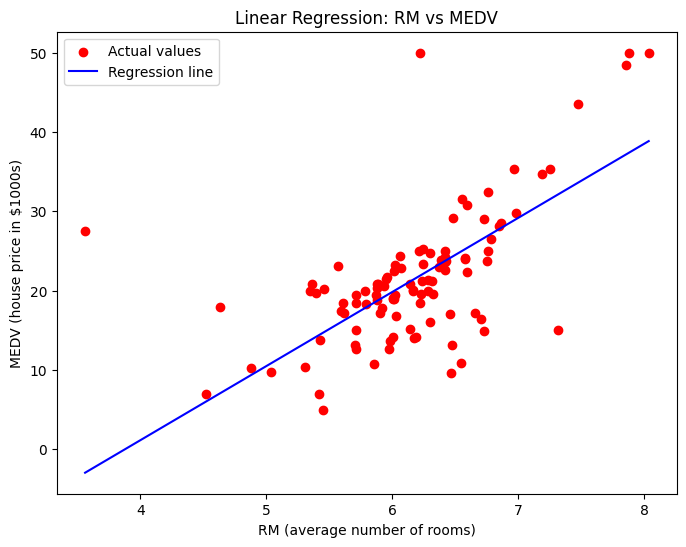

In [12]:
# We want to plot the regression line(blue) vs the actual value(red)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(x_test,y_test,color='red',label='Actual values')

x_test_sorted = np.sort(x_test.values.reshape(-1,1),axis=0)
y_line=linReg.predict(x_test_sorted)

plt.plot(x_test_sorted,y_line,color="blue",label="Regression line")

plt.xlabel('RM (average number of rooms)')
plt.ylabel('MEDV (house price in $1000s)')
plt.title('Linear Regression: RM vs MEDV')
plt.legend()
plt.show()